<a href="https://colab.research.google.com/github/doaa450/User-Classification/blob/main/Machine_Learning_for_User_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Case Description**

**Background**: In a machine learning classification problem, the algorithm assigns labels to instances based on their features. This Machine Learning for User Classification project will allow you to apply this technique by utilizing an excerpt of our own data stripped of personally identifiable information. You will examine student engagement metrics, such as the number of days students have spent on the platform, the minutes of watched content, and the number of courses they’ve started. You’ll then use this data to train several machine learning models, including logistic regression, k-nearest neighbors, support vector machines, decision trees, and random forests. The aim is to predict whether students would upgrade their free plan to a paid one.

**Business Objective**: Such an analysis is of utmost importance not only for 365 but for any online company. Predicting potential customers can be used for advertisement targeting or reaching out with exclusive offers. This helps allocate a budget for users likely to benefit from the product, aiming to increase the company’s revenue.

**Note**: This classification problem deals with a heavily imbalanced dataset—the number of students likely to keep their free plan exceeds the number predicted to purchase. You’re encouraged to research different data resampling methods, such as (among others) oversampling, undersampling, and SMOTE. But dealing with the data imbalance is not required to realize the project successfully.

 **Project files**

    ml_datasource.csv – the file contains the database for the project.
    Machine Learning Project.ipynb – the notebook contains a skeleton of the project for each task.


 **Project content**

    Part 1: Data Preprocessing
    Part 2: Creating a Logistic Regression Model
    Part 3: Creating a K-Nearest Neighbors Model
    Part 4: Creating a Support Vector Machines Model
    Part 5: Creating a Decision Trees Model
    Part 6: Creating a Random Forests Model
    Part 7: Results Interpretation

The Business Case

Machine learning’s numerous implications include improving business decision-making. This project provides a practical illustration of this use case. It focuses on predicting the likelihood of a student registered for a free plan purchasing a subscription on our platform. The decision is based on students’ activities on the platform—viewing lectures and participating in exams.

The project is inspired by an initiative 365 had in 2022 to predict student purchases before our Black Friday campaign. We wanted to create a list of students likelier to purchase and retarget them with unique ads on social media. But as it turned out, this was no easy task due to the extreme imbalance of the data—the number of students who had never purchased a subscription was much higher than the number of students who had. The primary reason for that was the free campaign we ran before the Black Friday one, where the platform was unlocked for free to all 365 students.

As you will see, such class imbalance combined with humans’ unpredictable behavior makes it challenging to predict student purchases.
The Database

The database you’ll work with consists of seven columns used as predictor variables and one as a target variable (the purchased column). The target variable is a binary column where 0 indicates a student who hasn’t bought a subscription and 1 represents a student who has. All predictor variables (except student_country) store metrics related to student behavior recorded between the following:

    Registration date and the last available date in our dataset: Oct 20, 2022, when the purchased column equals 0
    Registration date and their first purchase when the purchased column equals 1

In this way, we study students’ behavior only during their free-plan period on the platform.

# **Data Preprocessing**


### **Importing the Database**



The first step to creating a machine learning model is importing the data source. Import the data in the ml_datasource.csv file and carefully study the output.

Below are step-by-step instructions on how to execute this task.

    First, import the pandas library as pd.
    Load your data file into a pandas DataFrame. You can load a CSV file using the read_csv method, which needs to be followed by the name of your CSV file enclosed in quotes. The result should be stored in a variable for further use; call it raw_data.
    Call the head method to display the first five records in the DataFrame. Study the output.
    To avoid accidentally modifying the original data source, copy the raw data in a new variable and call it data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

In [2]:
df=pd.read_csv('/content/ml_datasource.csv')

In [3]:
df.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_started,practice_exams_passed,minutes_spent_on_exams,purchased
0,US,288,358.1,1,2,2,15.81,0
1,SG,260,1.7,1,1,0,16.00,0
2,TR,260,22.4,1,1,0,0.93,0
3,KE,259,18.8,1,1,1,14.63,0
4,IN,259,118.0,2,2,1,16.48,0


In [4]:
df.shape

(17761, 8)

In [5]:
df.dtypes

student_country            object
days_on_platform            int64
minutes_watched           float64
courses_started             int64
practice_exams_started      int64
practice_exams_passed       int64
minutes_spent_on_exams    float64
purchased                   int64
dtype: object

In [6]:
df['student_country'].nunique()

171

In [7]:
df['purchased'].value_counts()

0    16130
1     1631
Name: purchased, dtype: int64

### **Removing Outliers**

Examine the distribution plots of the numerical features and study their skewness.

Hint: You can use seaborn’s kdeplot method to plot the distributions.

Remove data points from the DataFrame that meet the following criteria:

    Minutes watched larger than 1,000
    Number of courses surpassing 10
    Number of practice exams started higher than 10
    Minutes spent on exams going beyond 40 minutes

Hint: To filter out the data, you can use, for example, a technique called Boolean indexing.

Below are step-by-step instructions on how to execute this task.

    Import the matplotlib.pyplot and seaborn libraries.
    Set the default seaborn theme for your plots using the set method, which will affect all subsequent plots.
    Create a continuous probability density curve using the kdeplot method. As an argument, it requires only the column you want to plot.
    To analyze the data more efficiently, you can display all plots simultaneously in subplots with the help of pyplot’s subplots method in the following way:

fig, axes = plt.subplots(3, 2, figsize=(20,20))

This will create a figure containing six subplots arranged in three rows and two columns. The figsize argument is a tuple of two integers representing the width and height of the figure in inches.
Then, using kdeplot’s ax parameter, specify the position of each subplot. For example,

sns.kdeplot(data=…, ax=axes[0,0])

will position the desired distribution subplot in the top left corner of the figure (first row, first column).

    Now that you’ve analyzed the distribution of each numerical variable, you must filter your DataFrame to exclude outliers. Using, for example, Boolean indexing, create a new DataFrame that includes only the rows where minutes_watched is less than or equal to 1,000, courses_started is less than or equal to 10, practice_exams_started is less than or equal to 10, and minutes_spent_on_exams is less than or equal to 40. Store the result in a new variable; call it data_no_outliers.

We could’ve lowered the cutoffs and reduced the skewness of the data even more. Still, we should be careful with removing too many datapoints—as a rule of thumb, we should remove no more than 5%. Additionally, we should remember that the data is heavily imbalanced, and removing too many datapoints from the minority class would lead to inaccurate predictions.

    To study the data distributions without outliers, create all six subplots anew using the data_no_outliers DataFrame.


In [8]:
df.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams', 'purchased'],
      dtype='object')

<ipython-input-9-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


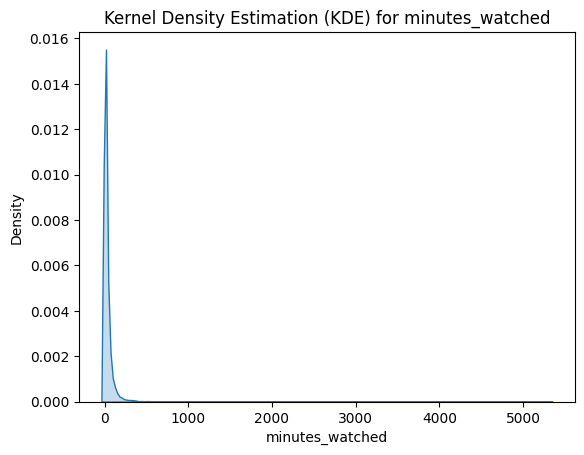

<ipython-input-9-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


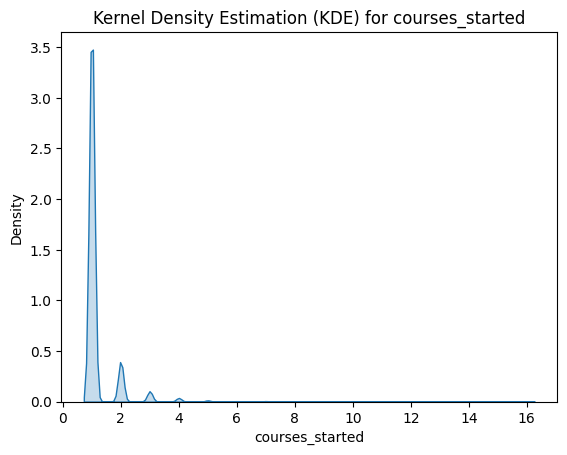

<ipython-input-9-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


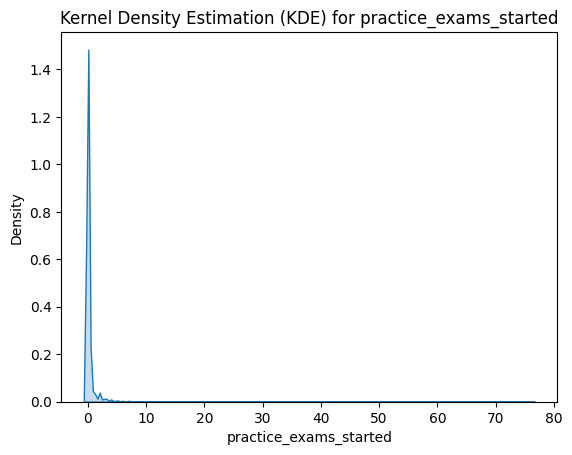

<ipython-input-9-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


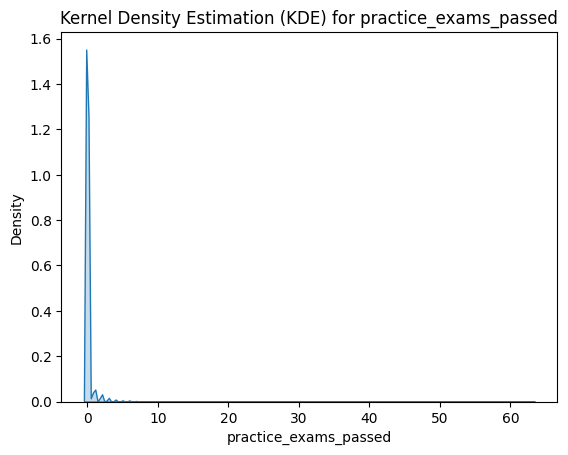

<ipython-input-9-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


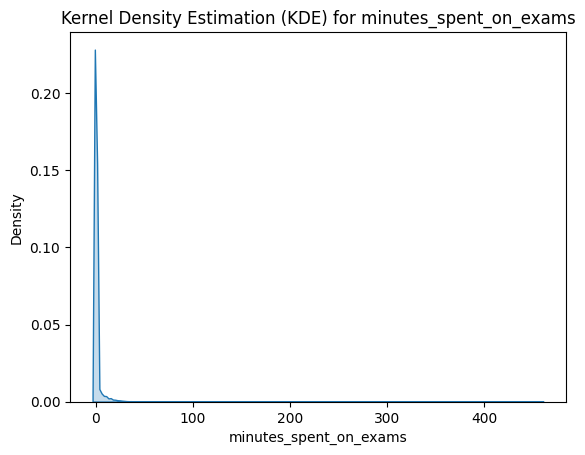

In [9]:
# Plot univariate KDE for each column
cols=[ 'minutes_watched',
       'courses_started',
       'practice_exams_started',
       'practice_exams_passed',
       'minutes_spent_on_exams']
for column in cols:
    sns.kdeplot(data=df[column], shade=True)
    plt.title(f'Kernel Density Estimation (KDE) for {column}')
    plt.xlabel(column)
    plt.show()

In [10]:
df=df[(df['minutes_watched']<=1000) & (df['courses_started']<=10) & (df['practice_exams_started']<=10)  & (df['minutes_spent_on_exams']<=40)]

<ipython-input-11-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


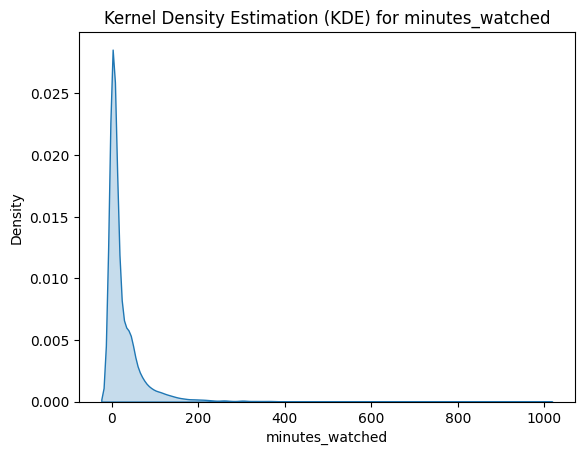

<ipython-input-11-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


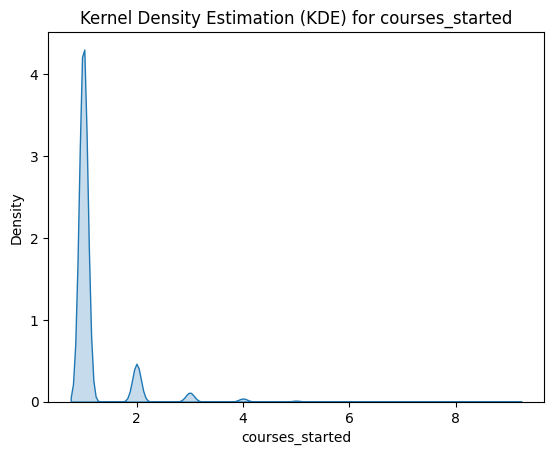

<ipython-input-11-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


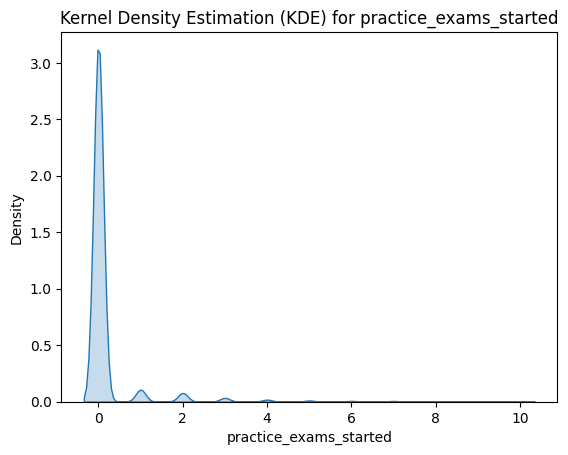

<ipython-input-11-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


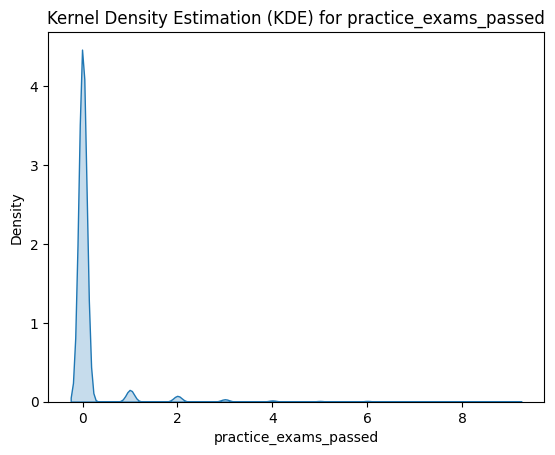

<ipython-input-11-80542662f18a>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], shade=True)


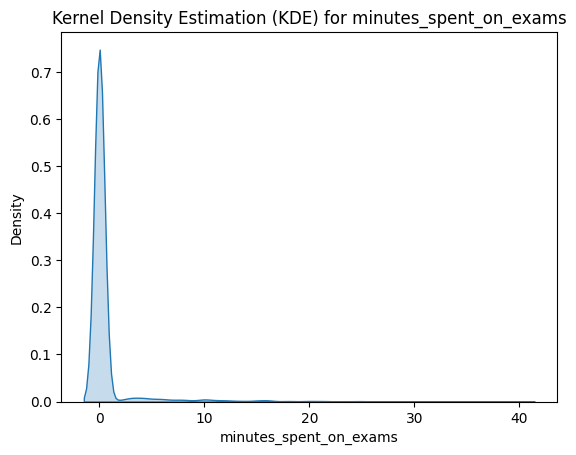

In [11]:
# Plot univariate KDE for each column
cols=[ 'minutes_watched',
       'courses_started',
       'practice_exams_started',
       'practice_exams_passed',
       'minutes_spent_on_exams']
for column in cols:
    sns.kdeplot(data=df[column], shade=True)
    plt.title(f'Kernel Density Estimation (KDE) for {column}')
    plt.xlabel(column)
    plt.show()

### **Checking for Multicollinearity**

The term ‘multicollinearity’ refers to a situation where two or more independent variables in a regression model are highly linearly related. Such a problem can make it difficult to determine the individual effect of predictors on the dependent variable and can lead to unstable coefficient estimates.

Although this project considers a classification rather than a regression problem, removing related feature variables is still important. A logistic regression model, for example, assumes its predictors are independent. Moreover, dealing with multicollinearity helps reduce the dimensionality (the number of feature variables) of a problem; high dimensionality is an issue that the k-nearest neighbors model, for instance, could suffer from. (Decision trees and random forests are seldom affected by multicollinearity.)

The Variance Inflation Factor (VIF) is a measure used to detect the presence of multicollinearity in a dataset. A value of 1 indicates that the features are not correlated, while a value greater than 1 suggests the presence of a correlation. As a rule of thumb, a variable with a VIF value higher than 5 indicates problematic multicollinearity.

Your task now is to check for multicollinearity in the data using the variance inflation factor (VIF) metric. Identify and remove the numerical feature with the highest VIF value. This is done because this feature is likely redundant with others in the dataset, and its removal can help reduce multicollinearity. After removing the column, calculate the VIF values again for the remaining numerical features. Now identify the feature with the highest VIF value. Is this value larger than 5?

Below are step-by-step instructions on how to execute this task.

    Import the variance_inflation_factor function from the statsmodels.stats.outliers_influence module.
    Apply the function to each variable to calculate the metric in question.
    Print out all VIF values and remove from the DataFrame the feature with a VIF value higher than 5. If more than one feature fulfills this condition, remove the feature with the highest VIF value. Removing it can be done by applying, for example, pandas’ drop method.
    The drop method also takes an axis argument. It specifies whether to drop the feature value by column (1) or row (0). In our case, we need the former to drop the feature by column.
    Store the result in a new DataFrame, and call it data_no_mult.
    Inspect the VIF values of the remaining columns again. Remove a column if its VIF value is greater than 5. Repeat the process until all columns in the DataFrame have a VIF value smaller than or equal to 5.


In [12]:
#Ref:https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[[ 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_started', 'practice_exams_passed',
       'minutes_spent_on_exams']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                  feature        VIF
0        days_on_platform   2.301237
1         minutes_watched   1.788777
2         courses_started   3.178713
3  practice_exams_started  10.201823
4   practice_exams_passed   7.812546
5  minutes_spent_on_exams   3.345478


In [14]:
df = df.drop('practice_exams_started',axis=1)

In [15]:
df.columns

Index(['student_country', 'days_on_platform', 'minutes_watched',
       'courses_started', 'practice_exams_passed', 'minutes_spent_on_exams',
       'purchased'],
      dtype='object')

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df[[ 'days_on_platform', 'minutes_watched',
       'courses_started',  'practice_exams_passed',
       'minutes_spent_on_exams']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                  feature       VIF
0        days_on_platform  2.299940
1         minutes_watched  1.788276
2         courses_started  3.174319
3   practice_exams_passed  2.562412
4  minutes_spent_on_exams  2.602966


### **Dealing with NaN Values**

In this next preprocessing step, we’ll deal with the NA/NaN values in the data source.

Applying .isnull().sum() to your DataFrame, you should see several NaN values in the student_country column. You can even inspect which those records are by executing the following line of code

df_name.loc[df_name['student_country'].isna()]

where you need to substitute df_name with the name of your DataFrame. Before removing those records, however, open the ml_datasource.csv file first (using Notepad, Excel, or other software of your choice) and study the records with student_country equal to NA. These records are precisely the ones you should have seen upon executing the line of code above. The only difference is that the student_country column in the CSV file reads NA, while in the pandas DataFrame it reads NaN.

As it turns out, the string NA in 365’s database refers to the country code of Namibia. But after importing the CSV file into a pandas DataFrame, this country code has been translated to NaN.

Your task is to substitute all NaN values in the student_country column with the string 'NAM'.

Hint: Research pandas’ fillna method.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

Below are step-by-step instructions on how to execute this task.

    The easiest way to replace NA/NaN values in a DataFrame is to use the fillna method provided by the pandas library. This method allows us to replace all NaN values in a DataFrame or a Series with a value of our choice.
    Inside the parentheses of the fillna method, you'll need to specify what value you want to replace the NaNs with. In this case, it's the string 'NAM'.
    The fillna method also takes an axis argument. It specifies whether to replace the NaN values by column or by row. The axis argument takes two possible values: 0 and 1. If axis is set to 0, the function will replace NaN values by row. If axis is set to 1, it will replace NaN values by column. In this case, we need the latter.
    Store the output of the fillna method call in a new DataFrame; call it data_no_nulls.
    Lastly, confirm that there are no NaN values left in your DataFrame.


In [17]:
df.isnull().sum()

student_country           8
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

In [18]:
df[df['student_country'].isna()]

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams,purchased
311,NaN,88,58.1,1,2,11.20,1
337,NaN,86,43.0,1,2,12.96,0
556,NaN,121,241.9,2,3,21.29,0
806,NaN,64,86.4,1,2,4.98,0
1097,NaN,72,67.5,1,1,6.27,0
12363,NaN,84,6.2,1,0,0.00,0
12633,NaN,78,3.0,1,0,0.00,0
16946,NaN,11,8.2,1,0,0.00,0


In [19]:
most_frequent_value = df['student_country'].mode()[0]
df['student_country'] = df['student_country'].fillna(most_frequent_value)

In [20]:
df.isnull().sum()

student_country           0
days_on_platform          0
minutes_watched           0
courses_started           0
practice_exams_passed     0
minutes_spent_on_exams    0
purchased                 0
dtype: int64

### Splitting the Data

Now that the data’s been preprocessed, it’s time to split it into targets and inputs. The former should include only the purchased column, while the latter should contain all columns except the purchased one.

Once that’s done, split the data further into training and testing sets with the following conditions:

    A 20% test size
    A random state of 365
    A stratified split for the target variable.

Below are step-by-step instructions on how to execute this task.

    First, create your inputs and target variables for your machine learning model. You can achieve this by using, for example, the drop() function to remove the purchased column from the inputs.
    Import the sklearn.model_selection library at the beginning of the notebook. To split your data into training and testing sets, use the train_test_split function which shuffles the dataset and splits it into training and testing sets.
    Inside the train_test_split function, you'll need to specify the following:
        Your input data
        Target data
        The proportion of the dataset to include in the testing set
        Random seed for reproducibility
        The decision to stratify the split
    The train_test_split function will return four values: the training data, testing data, training labels, and testing labels. Assign these outputs to x_train, x_test, y_train, and y_test, respectively.


In [21]:
# Separate features and target variable
X = df.drop('purchased',axis=1)
y = df['purchased']

# Use stratified sampling to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365, stratify=y)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (14100, 6)
X_test shape: (3526, 6)
y_train shape: (14100,)
y_test shape: (3526,)


In [22]:
y_train.value_counts()

0    12801
1     1299
Name: purchased, dtype: int64

In [23]:
(1299/12801)*100

10.147644715256622

In [24]:
y_test.value_counts()

0    3201
1     325
Name: purchased, dtype: int64

In [25]:
(325/3201)*100

10.153077163386442

### Encoding the Data

Before feeding the data to any training algorithm, we must store all features as numerical values. We should therefore deal with the student_country column storing values of a string data type. In this project, we’ll achieve this using the OrdinalEncoder class provided by sklearn. You can read its specifications in sklearn’s documentation:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

Create a new column in both the x_train and x_test DataFrames called student_country_enc, storing the encoded values of the countries. Then, drop the original student_country column.

Hint 1: Remember to use the fit_transform method on the training data and the transform method on the test data.

Hint 2: During the transformation procedure, you might get an error message reading that unknown categories from the student_country column are found during the transformation. (The encoder doesn’t know how to transform values from the test data that it hasn’t previously seen in the training data.) To manage that, modify the OrdinalEncoder instance to assign a chosen value to all country codes that are not present in the training data but present in the test data. The maximum encoded value in the training data is 165—so 170 is a good choice.

Hint 3: To avoid possible library incompatibility issues, convert the x_train, y_train, x_test, and y_test pandas objects to numpy ndarray objects of type float (for the inputs) or integer (for the targets). Using the naming conventions we’ve adopted in the guided version of this project, you can do so with the following piece of code:

x_train_array = np.asarray(x_train, dtype = 'float')
y_train_array = np.asarray(y_train, dtype = 'int')
x_test_array = np.asarray(x_test, dtype = 'float')
y_test_array = np.asarray(y_test, dtype = 'int')

You should import the numpy library as np to execute the code without errors.

Below are step-by-step instructions on how to execute this task.

    Initialize an instance of the OrdinalEncoder class from the sklearn.preprocessing module and call it enc, which you’ll use to convert categorical text data into numerical data. The handle_unknown parameter should be set to use_encoded_value and the unknown_value parameter to 170. This means that during the transformation process if the encoder encounters a category it did not see during fitting, it will assign it the encoded value of 170.
    Next, use the fit_transform method on the encoder to fit and transform the student_country column in your training data. The fit_transform method first learns the mappings (fits) from the unique values of the categories to the encoded values and then applies these mappings to the data (transforms). Since the fit_transform method expects a 2D array as input, you’d need to reshape your Series to a 2D array using, for example, .to_numpy().reshape(-1, 1). Assign the result of the transformation to a new column in your training data; call it student_country_enc. Use the following code and apply it to the test dataset accordingly.

x_train['student_country_enc'] = enc.fit_transform(x_train['student_country'].to_numpy().reshape(-1, 1));

    You can now drop the original student_country column from the training and testing datasets.
    To avoid library incompatibility issues and ensure your code will run irrespective of your library version, it’s recommended to convert the training and testing datasets into numpy ndarrays using the code from Hint 3 and employ them for training the machine learning models.


In [26]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder with specified categories
ordinal_encoder = OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=170)

# Fit and transform on training data
X_train['student_country'] = ordinal_encoder.fit_transform(X_train[['student_country']])

# Transform testing data, handling unknown categories
X_test['student_country'] = ordinal_encoder.transform(X_test[['student_country']])



In [27]:
X_train.head()

,student_country,days_on_platform,minutes_watched,courses_started,practice_exams_passed,minutes_spent_on_exams
5718,69.0,218,1.6,2,0,0.0
3119,69.0,263,75.5,1,0,0.0
5440,84.0,222,44.4,1,0,0.0
11828,147.0,97,2.6,1,0,0.0
8454,80.0,162,1.0,1,0,0.0


# Creating a Logistic Regression Model

 **Creating a Logistic Regression Model**

Create a logistic regression model using the training data and the Logit() function from the statsmodels library. Output the result’s summary. Then, predict the outcome of the test data. Follow these steps accordingly:

    If the predicted probability is smaller than or equal to 0.5, consider the prediction 0—the student won’t purchase a subscription.
    If the predicted probability is larger than 0.5, consider the prediction 1—the student will purchase a subscription.

Create a confusion matrix of your predictions.

Proceed with the task by following the instructions below.

    Start by importing the statsmodels.api module as sm.
    Set up your logistic regression model. The Logit() function takes in two arguments: the dependent variable (y_train_array) and the independent variables (x_train_array). Assign your target and features to this function and store the result in a new variable; let's call it log_reg.
    Next, use the fit() method on your log_reg model. This will start the logistic regression algorithm to learn the relationship between your independent and dependent variables in the training dataset. Store the result in a new variable; let's call it log_reg_results.
    Now that your model is fitted, you can look at a summary of the model by applying the summary() method on log_reg_results. This will provide you with valuable statistical information about your model, such as the coefficients of the predictors, standard errors, and p-values.
    With your model trained, you can now use it to make predictions on your test data. Use the predict() method on your log_reg_results and pass in your test features. This will output the probabilities of the positive class for each instance in your test data. Since you want to make class predictions (0 or 1) instead of probability predictions, you need to round these probabilities to the nearest integer.
    Display the confusion matrix using the ConfusionMatrixDisplay function from the sklearn.metrics module. Study the output.



In [28]:
import statsmodels.api as sm
# Fit logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Display the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.153158
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              purchased   No. Observations:                14100
Model:                          Logit   Df Residuals:                    14094
Method:                           MLE   Df Model:                            5
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.5018
Time:                        00:04:19   Log-Likelihood:                -2159.5
converged:                       True   LL-Null:                       -4334.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
student_country            0.0025      0.001      3.943      0.000       0.001     

In [29]:
 y_pred = result.predict(X_test)
 y_pred

2018     2.674065e-09
13491    1.674329e-02
14708    2.948995e-02
5627     2.993392e-07
15104    5.404977e-02
             ...     
5424     2.106637e-07
4063     1.804846e-07
694      6.326472e-03
17742    4.764376e-01
4196     9.476086e-08
Length: 3526, dtype: float64

In [30]:
# Convert predicted probabilities to binary predictions using a threshold (e.g., 0.5)
y_pred = (y_pred > 0.5).astype(int)

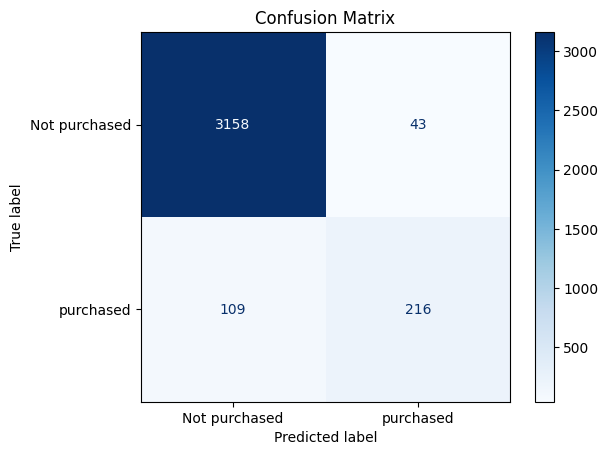

In [31]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not purchased', 'purchased'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

#Creating a K-Nearest Neighbors Model

 **Creating a K-Nearest Neighbors Model**

Use the training data and sklearn’s GridSearch optimizer to find the best K-nearest neighbors model. Let the decision for the best model be based on the accuracy score. Consider the following range of parameters:

    Number of neighbors – between 1 and 50, inclusive
    Weights – uniform and distance

Build a confusion matrix and print a classification report.

Refer to the instructions below to complete the task.

    1.Start by defining the range of parameters you want to tune. In this case, the parameters are n_neighbors (the number of neighbors to use in the majority voting process of KNN) and weights (the weight function to use in prediction). The values you want to try for n_neighbors range from 1 to 50 inclusive, and for weights you want to try uniform and distance. Create a dictionary with these parameters and assign it to a variable, say parameters_knn.

    2.Import the GridSearchCV optimizer from the sklearn.model_selection module, KNeighborsClassifier from the sklearn.neighbors module, and the classification_report function from the sklearn.metrics module.

    3.Create an instance of GridSearchCV. It performs an exhaustive search over specified parameter values for an estimator. It takes several parameters, including the estimator you want to use (KNeighborsClassifier), the parameters you want to tune (parameters_knn), and the scoring metric you wish to use to evaluate the model’s performance (accuracy). Store this instance in a variable, say grid_search_knn.

    4.Fit the grid_search_knn object to your training data. This will start the grid search process, which involves training a KNN model on the training data for each combination of parameters in the parameters dictionary and evaluating it using cross-validation.

    5.Once the grid search process is complete, you can find the best model that achieved the highest cross-validated accuracy score using the best_estimator_ attribute. Assign this to a variable, say knn_clf.

    6.With your optimized KNN model, you can now use it to make predictions on your test data. Call the predict function on knn_clf and pass in your test features (x_test_array). Store the predictions in a variable, say y_test_pred_knn.

    7.Finally, you can evaluate the performance of your optimized model on the test data by building a confusion matrix. You can use, for example, the ConfusionMatrixDisplay function.

    8.Lastly, you want to generate a classification report for your model. The classification report is a text summary of the precision, recall, F1 score and support for each class. Use sklearn's classification_report function to do this. This function takes as input the true labels and predicted labels. Additionally, you can pass in the names of your classes to the target_names parameter.



In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': np.arange(1, 51),  # Test k values from 1 to 51
    'weights': ['uniform', 'distance'],  # Test uniform and distance weights
    'p': [1, 2]  # Test Manhattan (p=1) and Euclidean (p=2) distances
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)


Best Hyperparameters: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
Accuracy of the Best Model: 0.9602949517867272


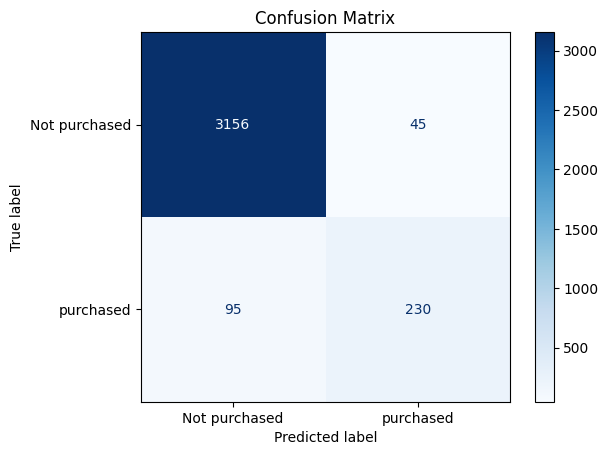

In [33]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not purchased', 'purchased'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

In [34]:
# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3201
           1       0.84      0.71      0.77       325

    accuracy                           0.96      3526
   macro avg       0.90      0.85      0.87      3526
weighted avg       0.96      0.96      0.96      3526



#**Creating a Support Vector Machines Model**

**Creating a Support Vector Machines Model**

Use the training data and sklearn’s GridSearch optimizer and SVC (Support Vector Classification) estimator to find the best support vector machines model. Let the decision for the best model again be based on accuracy. Consider the following range of parameters:

    kernel – linear, poly, or rbf
    C – between 1 and 10, inclusive
    gamma – scale or auto.

Before feeding the training data to the model, use sklearn's MinMaxScaler function to constrict the features in ranges between -1 and 1.

To test the model, build a confusion matrix and print a classification report.

Note: The fitting process might take around 10 minutes to execute.

Refer to the instructions below to complete the task.

    Start by importing MinMaxScaler from the sklearn.preprocessing module and SVC from the sklearn.svm module.
    Create an instance of MinMaxScaler. It transforms features by scaling them to a range defined by the feature_range parameter. Here, we want to scale all our features from -1 to 1.
    Next, use the fit_transform method on your training data. This will first fit the scaler to your training data by learning each feature’s minimum and maximum values. Then, it will transform the data by scaling each feature to the previously defined range.
    Apply the same scaling to your test data by calling the transform method. Avoid fitting the scaler again; it should always be fitted only on the training data.
    To implement the grid search and build the SVM model, follow the steps outlined in the Creating a K-Nearest Neighbors Model section.



In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
# Initialize MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Define the SVM classifier
svm_classifier = SVC()

# Define the parameter grid for grid search
param_grid = {
    'C': np.arange(1, 11),            # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'degree': [2, 3, 4],               # Degree of the polynomial kernel (only for 'poly')
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf' and 'poly'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_svm_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_svm_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Best Hyperparameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy of the Best Model: 0.9557572319909245
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.82      0.67      0.74       325

    accuracy                           0.96      3526
   macro avg       0.89      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



In [36]:
# Generate a classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

# Display the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3201
           1       0.82      0.67      0.74       325

    accuracy                           0.96      3526
   macro avg       0.89      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



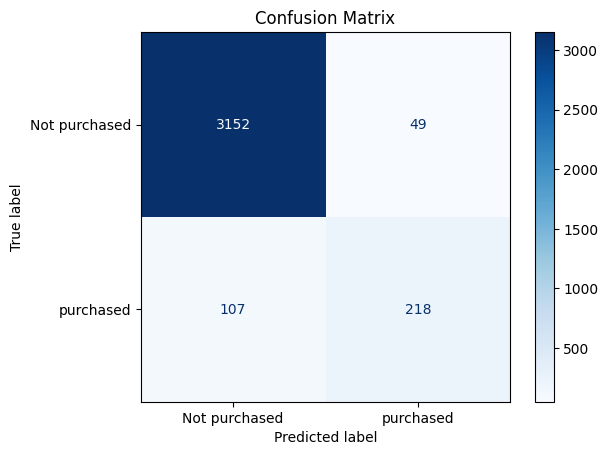

In [37]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not purchased', 'purchased'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

# Creating a Decision Trees Model

 **Creating a Decision Trees Model**

Use the (non-scaled) training data and sklearn’s GridSearch and DecisionTreeClassifier functions to find the best decision tree model. Let the best model be determined based on accuracy. Loop only through the parameter ccp_alpha and test the values 0, 0.001, 0.002, 0.003, 0.004, and 0.005. Set a random state of 365 to control the randomness of the estimator.

Display the decision tree, build a confusion matrix, and print a classification report. Interpret the results.

Proceed with the task by following the instructions below.

    Create the grid search similarly to the grid searches you’ve created for previous models.
    Import DecisionTreeClassifier and plot_tree from the sklearn.tree module.
    To visualize the decision tree, start by setting the size of your figure using, for example, plt.figure(figsize=(15,10)). This will define the size of the output plot.
    Next, use the plot_tree function to generate a graphical representation of the decision tree.
        The first parameter is the trained decision tree classifier.
        The second parameteris filled and should be set to True. It colors the boxes representing the decision nodes. The color tone corresponds to the purity of the node, with lighter tones indicating less pure nodes.
        The feature_names parameter is a list of strings corresponding to the names of the features in the order they were used for training. This will label each decision split in the tree with the corresponding feature name.
        The class_names parameter is a list of strings representing the class labels. This will label each leaf node with the corresponding class label.
    Call plt.show() to display the generated plot. This will output the graphical representation of your decision tree.
    Finally, perform the fitting and testing similarly to way you've done so for previous models.



Best Hyperparameters: {'ccp_alpha': 0.005, 'criterion': 'entropy', 'max_depth': None}
Accuracy of the Best Model: 0.9577424844015882


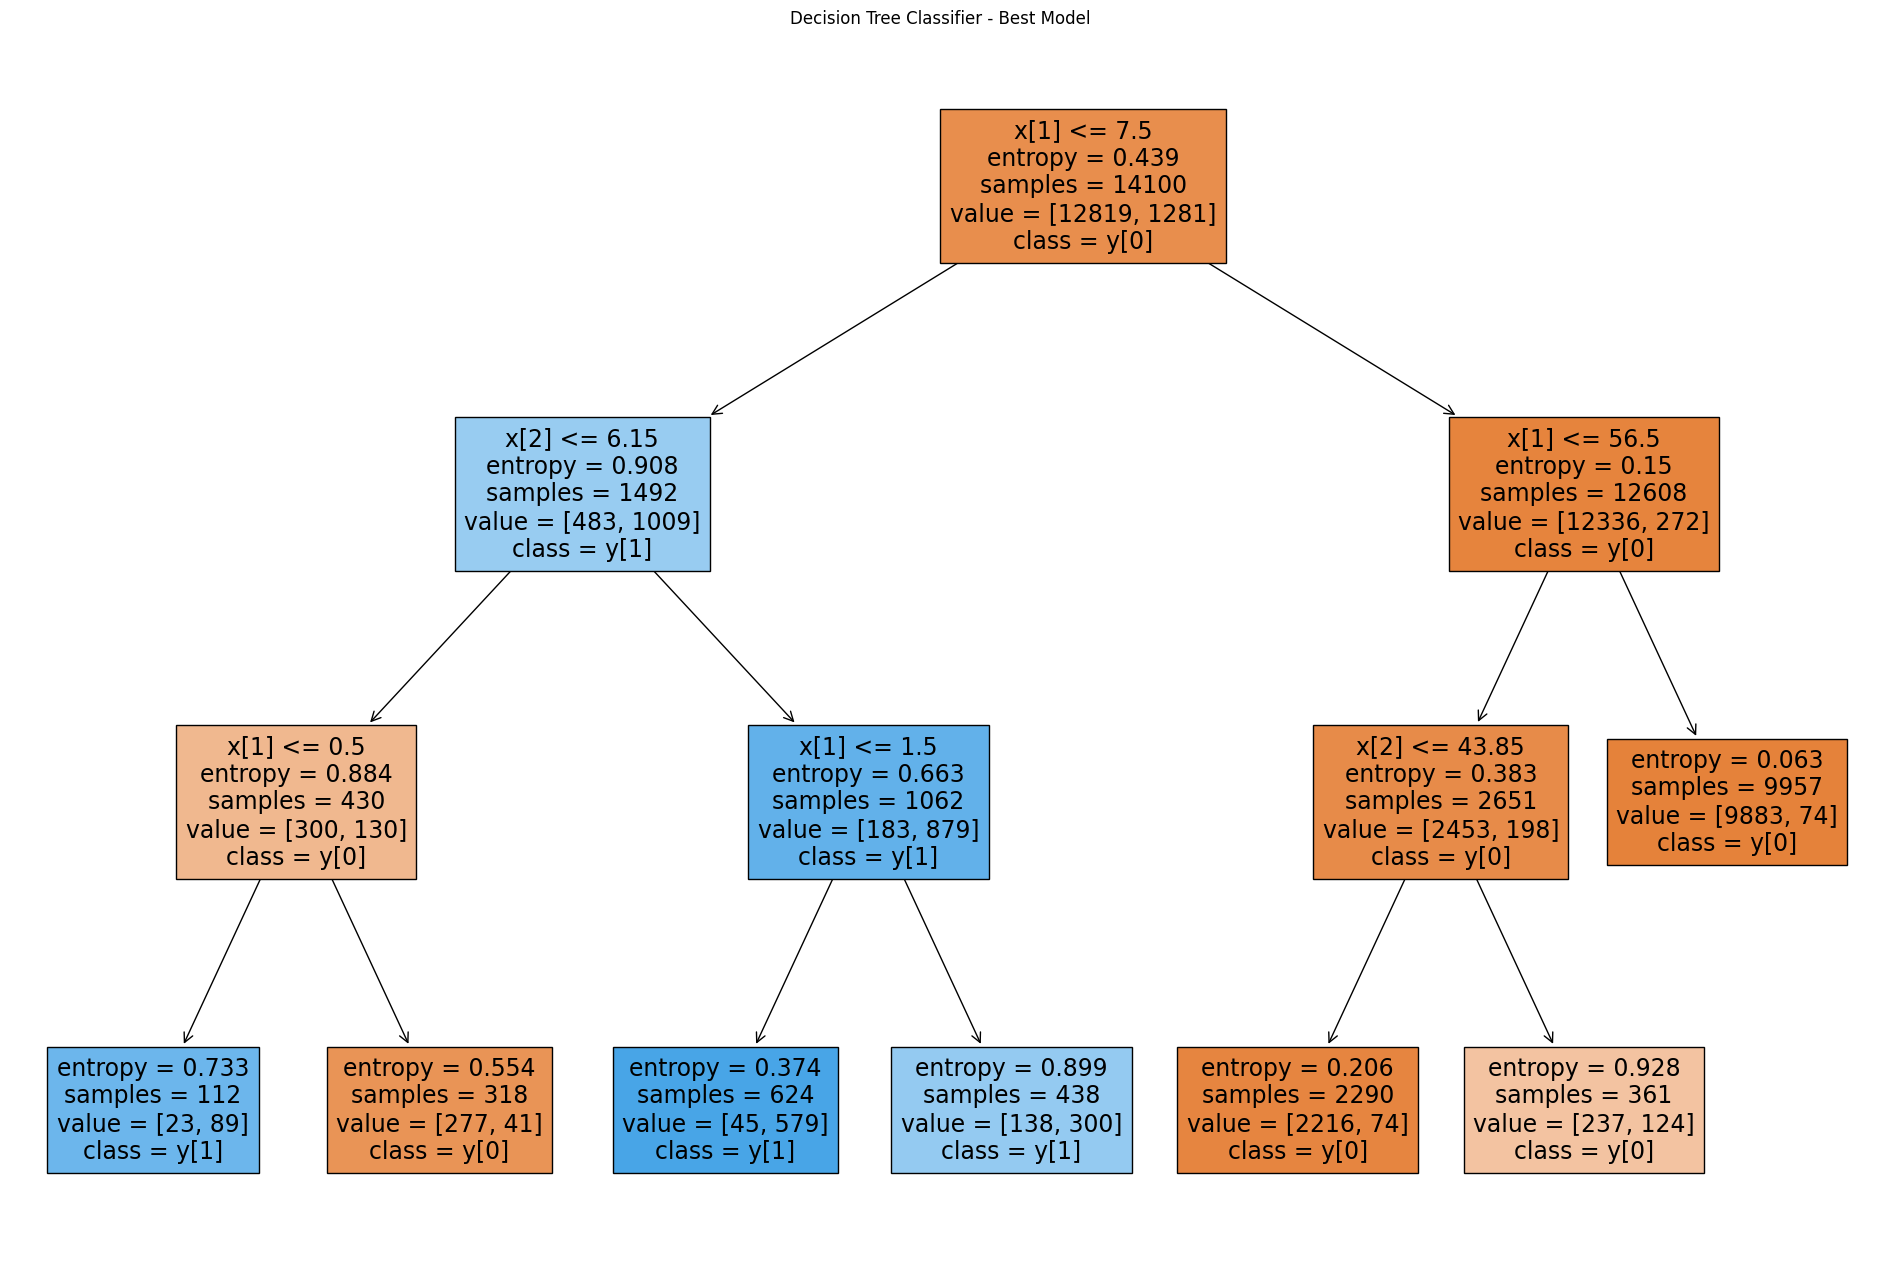

In [38]:

from sklearn.tree import DecisionTreeClassifier, plot_tree

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=365)

# Initialize OrdinalEncoder with specified categories
ordinal_encoder = OrdinalEncoder( handle_unknown='use_encoded_value', unknown_value=170)

# Fit and transform on training data
X_train['student_country'] = ordinal_encoder.fit_transform(X_train[['student_country']])

# Transform testing data, handling unknown categories
X_test['student_country'] = ordinal_encoder.transform(X_test[['student_country']])

# Define the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'ccp_alpha':[0, 0.001, 0.002, 0.003, 0.004,  0.005]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Evaluate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Best Model:", accuracy)

# Plot the decision tree for the best model
plt.figure(figsize=(24, 16))
plot_tree(best_dt_model, class_names=True, filled=True)
plt.title("Decision Tree Classifier - Best Model")
plt.show()


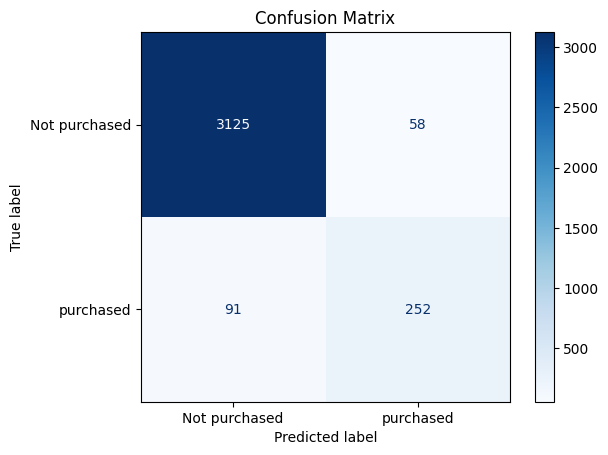

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not purchased', 'purchased'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

 # **Creating a Random Forests Model**


 **Creating a Random Forests Model**

Using sklearn’s RandomForestClassifier and the ccp_alpha value that gave the best accuracy in the previous task (Creating a Decision Trees Model), create a Random Forest model. Set a random state of 365 to control the randomness of the estimator. Leave all other arguments at their default values.

To complete the task, follow the instructions below.

    At the beginning of the notebook, import RandomForestClassifier from the sklearn.ensemble module.
    Create an instance of the RandomForestClassifier, using the ccp_alpha value that gave the best accuracy in the previous task. Set a random state of 365 and leave all other arguments at their default values.
    Fit the model using the training data.
    Make predictions on the test data.
    Display the confusion matrix and classification report of the model.



In [40]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=365,ccp_alpha=0.005)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9563244469653999
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3183
           1       0.85      0.67      0.75       343

    accuracy                           0.96      3526
   macro avg       0.91      0.83      0.86      3526
weighted avg       0.95      0.96      0.95      3526



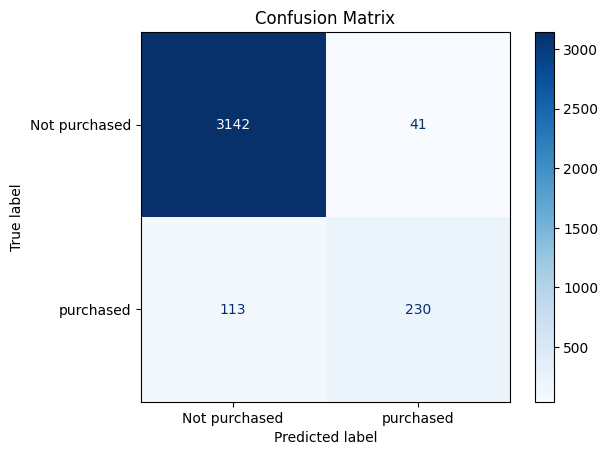

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not purchased', 'purchased'])
disp.plot(cmap='Blues', values_format='.0f')
plt.title('Confusion Matrix')
plt.show()

# **Results Interpretation**

 **Results Interpretation**

Interpret the confusion matrices, classification reports, and summaries—in the case of the logistic regression model—of all models you’ve created in this project. Can you think of ways to improve the models’ performance?

Answer the following questions:

    What is the LLR (Log Likelihood Ratio) p-value in the summary of the logistic regression model, and what does it tell us?
    What is the equation of the logit model, considering only statistically significant variables?
    Which are the features that influence the decision in the decision tree model?
    What observations and conclusions can you make based on the confusion matrices? Does the accuracy of the model determine its predictive power?
    How can we use the results from the models?
    What actions can we undertake to improve the models?



What is the LLR (Log Likelihood Ratio) p-value in the summary of the logistic regression model, and what does it tell us?

Ref:https://investigate.ai/regression/evaluating-logistic-regressions/

Typically a p value of 0.05 (or 5%) is thought of as "good" or "statistically significant," as there's only a 5% or less chance that these results aren't valid. Our p-value is 0.00, which is excellent.


What is the equation of the logit model, considering only statistically significant variables?

the equation of the logit model is :
y= coef

Which are the features that influence the decision in the decision tree model?

What observations and conclusions can you make based on the confusion matrices? Does the accuracy of the model determine its predictive power?

How can we use the results from the models?


What actions can we undertake to improve the models?

Part 7: Results Interpretation

Throughout this project, you've constructed multiple classification models intending to identify the one that most accurately categorizes students into 'potential purchasers' and 'unlikely purchasers' based on their platform activity. When accurate, such predictions are of utmost importance for a business since it allows the marketing team to concentrate resources on promoting the product to the demographic most likely to demonstrate interest and gain from a subscription.

At 365, we endeavored to develop such a model for our 2022 Black Friday campaign. Our goal was to filter out those registered students who were likely to take advantage of a preferential subscription price. But we faced a significant hurdle.

The dataset we obtained for our Black Friday analysis had a significant drawback similar to this project’s: extreme imbalance. In other words, the number of representatives of one of the classes (students who haven’t purchased a subscription) significantly outnumbered the one from the second class (number of users who have).

Of course, this is unsurprising. Many users register with the primary intention of getting acquainted with the product and skimming the pages. Some of them, however, enter the platform to benefit from the free content of the website, exhibiting behavior that mirrors the one of students who ultimately purchase a subscription. This overlap makes it difficult to isolate the latter group exclusively. It also leads to the conclusion that the features included in this database are insufficient, and more knowledge of the users’ behavior and background is needed.

Now, let’s study the technical details of the project.

    What is the LLR (Log Likelihood Ratio) p-value in the summary of the logistic regression model, and what does it tell us?
    The LLR p-value is a statistic used to test if a logistic regression model is ‘useless,’ i.e., statistically different from a model with no predictors. The p-value we obtained for the model is 0.000, smaller than 0.050, which indicates that our model is statistically significant.

    What is the equation of the logit model, considering only statistically significant variables?
    Statistically insignificant variables are those with a p-value equal to or larger than 0.05. The only such variable is x4, corresponding to practice_exams_passed, with a p-value of 0.270.

Without considering this variable, the logit model obeys the following equation:

log(π1−π)=−0.0691×days_on_platform++0.0144×minutes_watched−−0.2885 ×courses_started−−0.0670 ×minutes_spent_on_exams++0.0026 ×student_country_enc

where π

is the probability of the event occurring. Or, in our case, the likelyhood of a student purchasing a subscription.

    Which are the features that influence the decision in the decision tree model?
    The decision tree shows that the only features influencing the decision are days_on_platform and minutes_watched. The boxes where these features appear are highlighted in the figure below.

    What observations and conclusions can you make based on the confusion matrices?
    Studying the models’ confusion matrices and classification reports, we see that their accuracy is impressive at around 0.96. But this metric is so high because many students were correctly predicted to keep their free plan. The precision and recall metrics of the second class are not as high.  

    As to which of the models performs best, all six perform similarly, with close precision and recall metrics values. Still, the ones with the highest F1 score —a metric that penalizes low accuracy and low recall—for both classes are the decision trees and random forests models.

    Logistic Regression 	Precision 	Recall 	F1-Score
    Class 0 	0.97 	0.99 	0.98
    Class 1 	0.83 	0.66 	0.74
    K-Nearest Neighbors
     Class 0 	0.97 	0.98 	0.98
     Class 1 	0.79 	0.71 	0.75
     Support Vector Machines
     Class 0 	0.97 	0.98 	0.98
     Class 1 	0.81 	0.68 	0.74
     Decision Trees
     Class 0 	0.98 	0.98 	0.98
     Class 1 	0.81 	0.76 	0.78
    Random Forests
     Class 0 	0.97 	0.98 	0.98
     Class 1 	0.82 	0.74 	0.78

    How can we use the results from the models?
    Machine learning models such as these are highly valuable to a company. They help, for example, the marketing team with concentrating campaign budgets on advertisements more optimally. We can retrieve a list of students most likely to purchase a subscription using the models designed. Those students can be targeted through paid social media advertisements and exclusive offers.

    We should be aware of the risks and remember that these are simply predictions based on students’ activity inside the platform, which does not guarantee a 100% success rate. The decision to purchase a product depends not only on the behavior inside the platform but also on the student's demographics, financial status, and daily workload—i.e., whether they have enough time to embark on a new career path. Other elements of human behavior are challenging to predict.

    What can we do to improve the models?
    First, the data for this project is highly imbalanced. Some techniques deal with such datasets as over and undersampling. The first technique artificially generates new datapoints from the minority (paying students) class. In contrast, the second reduces the majority (free-plan students) class volume.

    These come with limitations. In the case of oversampling, we create more datapoints, but that doesn’t mean we bring new and valuable information to the table. The latest datapoints are generated based on our knowledge of the minority class. Similarly, with undersampling, we reduce the majority class size at the cost of losing valuable information.

    To mitigate these shortcomings, hybrid techniques—such as the Synthetic Minority Oversampling Technique (SMOTE)—are developed where a combination of over and undersampling is performed to balance the classes in a classification problem. You can learn more about these techniques in The Machine Learning Process A-Z course:
    https://learn.365datascience.com/courses/preview/learn-machine-learning-process-a-z/

    It’s essential to note that these are not the only tools available to handle imbalanced datasets. Despite the challenges datasets present, it’s still possible—with careful management—to train models on these datasets that yield reliable and insightful results.

    Other ways to increase the models’ performance include reducing the problem’s dimensionality or searching for other independent variables. Such could be participation in the Q&A hub, number of logins, price page visits, etc. More exhaustive grid searches and better fine-tuning could also enhance the performance of the models.

    Finally, we can go beyond the machine learning realm and implement a neural network model that could spot patterns that machine learning models miss.
